# STA130 Homework 06

Please see the course [wiki-textbook](https://github.com/pointOfive/stat130chat130/wiki) for the list of topics covered in this homework assignment, and a list of topics that might appear during ChatBot conversations which are "out of scope" for the purposes of this homework assignment (and hence can be safely ignored if encountered)

## "Week of Oct21" HW [*due prior to the Nov08 TUT*]

### 1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create *python* code explicitly demonstrating your explanation using *numpy* and *scipy.stats* <br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _Your answer can be quite concise and will likely just address the "mathematical" and "statistical" aspects of the process of a **Simple Linear Model** specification, perhaps giving an intuitive interpretation summary of the result as a whole_
>   
> - _Your code could be based on values for `n`, `x`, `beta0`, `beta1`, and `sigma`; and, then create the `errors` and `Y`_
> 
> - _The predictors $x_i$ can be fixed arbitrarily to start the process (perhaps sampled using `stats.uniform`), and they are conceptually different from the creation of **error** (or **noise**) terms $\epsilon_i$ which are sampled from a **normal distribution** (with some aribtrarily *a priori* chosen **standard deviation** `scale` parameter $\sigma$) which are then combined with $x_i$ through the **Simple Linear Model** equation (based on aribtrarily *a priori* chosen **slope** and **intercept coefficients**) to produce the $Y_i$ outcomes_
> 
> - _It should be fairly easy to visualize the "a + bx" line defined by the **Simple Linear Model** equation, and some **simulated** data points around the line in a `plotly` figure using the help of a ChatBot_
> 
> _If you use a ChatBot (as expected for this problem), **don't forget to ask for summaries of your ChatBot session(s) and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatGPT)**_
>
> 
> _**Question Scope Warning:** Be careful when using a ChatBot to help you with creating an example dataset and coding up a visualization though, **because it might suggest creating (and visualizing) a fitted model for to your data (rather than the theoretical model); but, this is not what this question is asking you to demonstrate**. This question is not asking about how to produce a fitted **Simple Linear Regression** model or explain how model **slope** and **intercept coefficients** are calculated (e.g., using "ordinary least squares" or analytical equations to estimate the **coefficients**  for an observed dataset)._
> 
> ```python
> # There are two distinct ways to use `plotly` here
>
> import plotly.express as px
> px.scatter(df, x='x',  y='Y', color='Data', 
>            trendline='ols', title='Y vs. x')
>        
> import plotly.graph_objects as go
> fig = go.Figure()
> fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Data'))
> 
> # The latter is preferable since `trendline='ols'` in the former 
> # creates a fitted model for the data and adds it to the figure
> # and, again, THAT IS NOT what this problem is asking for right now
> ```
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_  
</details>


# 1.Theoretical Simple Linear Regression Model Explanation
A Simple Linear Regression model expresses the relationship between a predictor variable (a) and an outcome variable (b). The model can be described as follows:

Where:

b_i: Outcome or dependent variable for observation i.
a_i: Predictor or independent variable for observation i.
c_0: Intercept, representing the expected value of b when a = 0.
c_1: Slope, indicating the change in b for a unit change in a.
d_i: Error term for observation i, accounting for random deviations from the true linear relationship. It is assumed to be normally distributed with mean 0 and a standard deviation (e).
Explanation Summary
The model defines b as a linear function of a, adjusted by a random error term (d). The intercept (c_0) shifts the line vertically, while the slope (c_1) defines the steepness. The error term (d) represents the variability around the line due to factors not captured by a.

By specifying a, c_0, c_1, and e, you can simulate values of b, assuming errors follow a normal distribution. This process generates a sample from the assumed linear relationship.

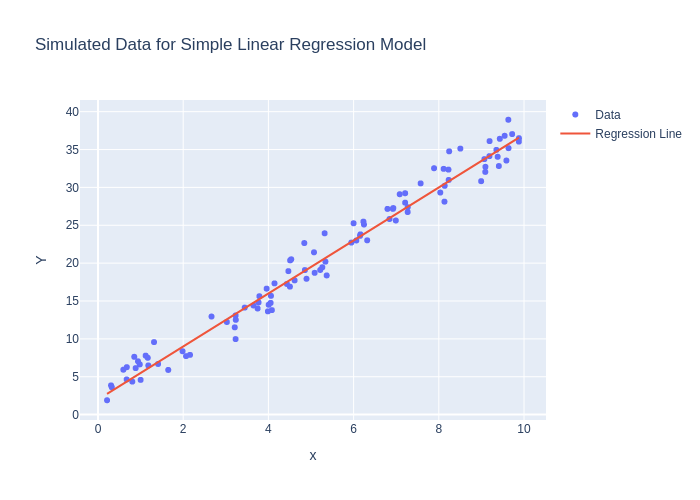

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import norm, uniform

# Parameters
n = 100  # Number of observations
beta0 = 2.0  # Intercept
beta1 = 3.5  # Slope
sigma = 1.5  # Standard deviation of errors

# Generating predictor values (x) using a uniform distribution
x = uniform.rvs(0, 10, size=n)

# Generating error terms (epsilon) from a normal distribution
epsilon = norm.rvs(0, sigma, size=n)

# Generating outcome values (Y) using the Simple Linear Regression equation
Y = beta0 + beta1 * x + epsilon

# Plotting the theoretical regression line and data points
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Data'))
fig.add_trace(go.Scatter(x=x, y=beta0 + beta1 * x, mode='lines', name='Regression Line'))
fig.update_layout(title='Simulated Data for Simple Linear Regression Model', xaxis_title='x', yaxis_title='Y')
fig.show(renderer="png")


This code simulates a dataset where:

𝑥 values are generated from a uniform distribution.

ϵ values are sampled from a normal distribution with standard deviation 

Y values are calculated based on the theoretical model.
The plot visualizes the data points and the theoretical regression line (without fitting a model), showing the variation around the line due to the error terms.

# summary

A Simple Linear Regression model describes the relationship between a predictor variable (a) and an outcome variable (b). It includes an intercept (c_0) that shifts the line vertically and a slope (c_1) that defines the rate of change in b for each unit increase in a. An error term (d) accounts for random deviations and follows a normal distribution. By specifying these components, you can simulate values of b based on this linear relationship.

The link of the chatbot:https://chatgpt.com/share/671bd1fd-0260-8003-8475-3a60b1dc8fc7

### 2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using *pandas* and *import statsmodels.formula.api as smf*<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> - _Combine the **simulated** `x` and `Y` into a `pandas` data frame object named `df` with the column names "x" and "Y"_
> 
> - _Replace the inline question comments below with their answers (working with a ChatBot if needed)_
>
> ```python
> import statsmodels.formula.api as smf  # what is this library for?
> import plotly.express as px  # this is a ploting library
>
> # what are the following two steps doing?
> model_data_specification = smf.ols("Y~x", data=df) 
> fitted_model = model_data_specification.fit() 
>
> # what do each of the following provide?
> fitted_model.summary()  # simple explanation? 
> fitted_model.summary().tables[1]  # simple explanation?
> fitted_model.params  # simple explanation?
> fitted_model.params.values  # simple explanation?
> fitted_model.rsquared  # simple explanation?
>
> # what two things does this add onto the figure?
> df['Data'] = 'Data' # hack to add data to legend 
> fig = px.scatter(df, x='x',  y='Y', color='Data', 
>                  trendline='ols', title='Y vs. x')
>
> # This is essentially what above `trendline='ols'` does
> fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
>                 line=dict(color='blue'), name="trendline='ols'")
> 
> fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS
> ```
>
> _The plotting here uses the `plotly.express` form `fig.add_scatter(x=x, y=Y)` rather than the `plotly.graph_objects` form `fig.add_trace(go.Scatter(x=x, y=Y))`. The difference between these two was noted in the "Further Guidance" comments in the previous question; but, the preference for the former in this case is because `px` allows us to access `trendline='ols'` through `px.scatter(df, x='x',  y='Y', trendline='ols')`_
>
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_      

</details>

# 2.Summary of the Python Code and Answers to Inline Questions

Library Explanation:

import statsmodels.formula.api as smf: This library is used for statistical modeling in Python, specifically for specifying and fitting linear models using formulas similar to those in R (e.g., Y ~ x for a linear regression model).
Steps Explanation:

model_data_specification = smf.ols("Y~x", data=df): This specifies an Ordinary Least Squares (OLS) regression model with Y as the dependent variable and x as the predictor using the data in the DataFrame df.
fitted_model = model_data_specification.fit(): This fits the OLS model to the data, estimating the coefficients (slope and intercept).
Fitted Model Summaries:

fitted_model.summary(): Provides a comprehensive summary of the regression results, including coefficients, p-values, R-squared value, and more. It’s useful for diagnosing the fit and interpreting the model.
fitted_model.summary().tables[1]: Displays a simplified table containing the coefficient estimates (intercept and slope), standard errors, t-values, and p-values.
fitted_model.params: Returns a Pandas Series with the estimated coefficients for the intercept and slope.
fitted_model.params.values: Extracts the coefficients as a NumPy array for easier manipulation or further calculations.
fitted_model.rsquared: Provides the R-squared value, which indicates how much of the variance in the dependent variable 
𝑌
Y is explained by the model.
Adding Elements to the Figure:

df['Data'] = 'Data': This step adds a column called "Data" to the DataFrame to differentiate the data points in the plot’s legend.
The px.scatter function creates a scatter plot with a fitted OLS trendline.
trendline='ols': Adds the fitted regression line based on the model.
fig.add_scatter(...): Manually adds the fitted regression line as an overlay, equivalent to what trendline='ols' does.

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     6305.
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           9.25e-91
Time:                        15:02:24   Log-Likelihood:                -162.15
No. Observations:                 100   AIC:                             328.3
Df Residuals:                      98   BIC:                             333.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7173      0.256     10.622      0.0

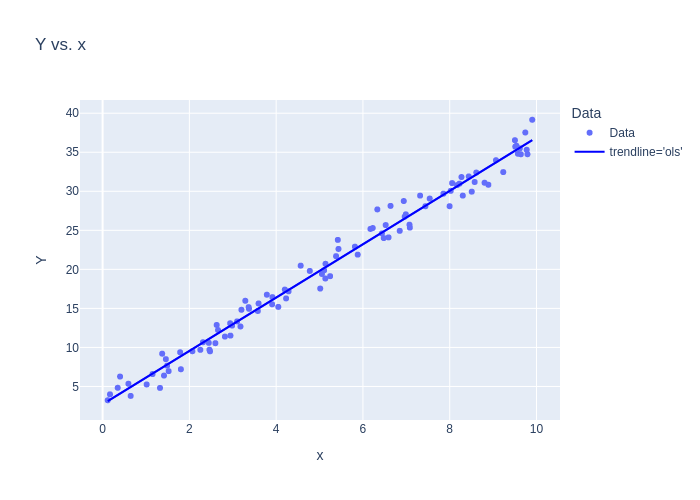

In [3]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import norm, uniform

# Parameters
n = 100  # Number of observations
beta0 = 2.0  # Intercept
beta1 = 3.5  # Slope
sigma = 1.5  # Standard deviation of errors

# Generating predictor values (x) using a uniform distribution
x = uniform.rvs(0, 10, size=n)

# Generating error terms (epsilon) from a normal distribution
epsilon = norm.rvs(0, sigma, size=n)

# Generating outcome values (Y) using the Simple Linear Regression equation
Y = beta0 + beta1 * x + epsilon

# Combining x and Y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Fitting a simple linear regression model using statsmodels
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Viewing model summaries
print(fitted_model.summary())  # Full summary
print(fitted_model.summary().tables[1])  # Coefficient table
print(fitted_model.params)  # Coefficients (intercept and slope)
print(fitted_model.params.values)  # Coefficients as an array
print(fitted_model.rsquared)  # R-squared value

# Visualizing the data and the fitted model
df['Data'] = 'Data'  # Add a column for labeling

# Plotting the scatter plot with trendline using plotly
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Manually adding the fitted trendline to ensure consistency with trendline='ols'
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

# Display the plot
fig.show(renderer="png")  # Use this renderer for GitHub/MarkUs submissions


# Summary:

The code demonstrates how to fit a Simple Linear Regression model using statsmodels and visualize it with plotly. It begins by simulating data using a theoretical linear model with specified slope, intercept, and error terms. The data is then combined into a Pandas DataFrame and a model is fitted using smf.ols. The fitted model provides key statistics, such as coefficients and R-squared value. Finally, the code visualizes the data points and the regression line using plotly, showing the fit of the model.

The link of the chatBot :https://chatgpt.com/share/671bd1fd-0260-8003-8475-3a60b1dc8fc7

### 3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; *but, hint though: simulation of random sampling variation*<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _This question is effectively asking you to explain what the combined code you produced for Questions 1 and 2 is trying to demonstrate overall. If you're working with a ChatBot (as expected), giving these two sets of code as context, and asking what the purpose of comparing these lines could be would be a way to get some help in formulating your answer_
> 
> _The graphical visualization aspect of this question could be accomplished by appending the following code to the code provided in Question 2._
> 
> ```python
> # what does this add onto the figure in constrast to `trendline='ols'`?
> x_range = np.array([df['x'].min(), df['x'].max()])
> # beta0 and beta1 are assumed to be defined
> y_line = beta0 + beta1 * x_range
> fig.add_scatter(x=x_range, y=y_line, mode='lines',
>                 name=str(beta0)+' + '+str(beta1)+' * x', 
>                 line=dict(dash='dot', color='orange'))
>
> fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS
> ```
> 
> _The right way to interactively "see" the answer to this question is to repeatedly create different dataset **simulations** using your theoretical model and the corresponding fitted models, and repeatedly visualize the data and the two lines over and over... this would be as easy as rerunning a single cell containing your simulation and visualization code..._
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_  
</details>

3.

Explanation of Adding the Theoretical Line
The theoretical line from Question 1 represents the true underlying relationship between 
𝑥 and 𝑌 based on the specified parameters (𝛽0 and 𝛽1 ).

In contrast, the trendline from Question 2 represents the fitted model based on the simulated dataset and incorporates random sampling variation.

By comparing the two lines on the same plot, you can visualize how closely the fitted model approximates the true relationship and how the random error term affects the estimation. The fitted line may not perfectly match the theoretical line because each simulated dataset introduces variation due to the randomness in error terms.

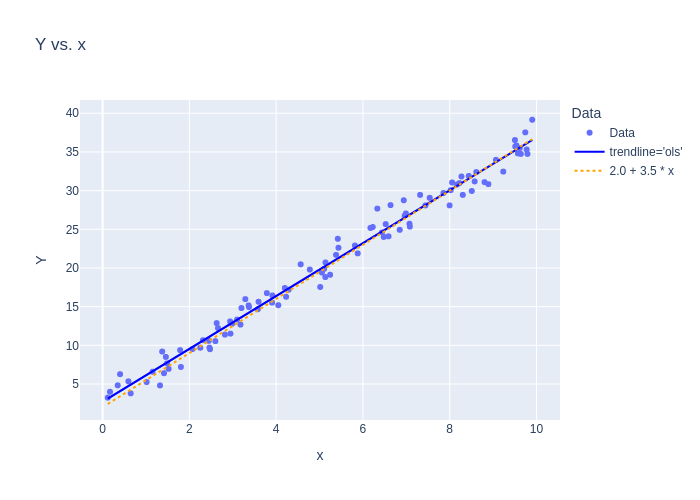

In [4]:
# Adding the theoretical line to the plot (Question 1)
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Display the plot
fig.show(renderer="png")  # Use this renderer for GitHub/MarkUs submissions


Explanation of the Difference Between the Two Lines

Theoretical Line: This line shows the exact relationship as defined by the parameters (𝛽0 , 𝛽1 ) with no sampling error. It is a dotted orange line and serves as the "true" model.

Fitted Line: This line is based on the simulated dataset and fitted using ordinary least squares (OLS). It takes into account the random sampling variation, which means it may deviate from the theoretical line depending on the random noise added to each simulation.
Purpose of the Comparison

The purpose of comparing these lines is to illustrate the effect of random sampling variation on estimating the model parameters. In real-world scenarios, data collected often includes this kind of variation, and the goal of fitting a model is to estimate the underlying relationship as accurately as possible despite these fluctuations. By repeatedly visualizing the two lines with different datasets, you can see how close the fitted model gets to the true model under various sampling conditions.

# Summary:

The code adds the theoretical regression line (from Question 1) alongside the fitted line (from Question 2) on the same plot. The theoretical line shows the exact relationship based on predefined parameters without sampling error, while the fitted line incorporates random sampling variation. Comparing these lines demonstrates how random variation affects the estimation, highlighting that fitted models might not perfectly match the true relationship due to the inherent randomness in the data.

The link of the chatBot :https://chatgpt.com/share/671bd1fd-0260-8003-8475-3a60b1dc8fc7

### 4. Explain how *fitted_model.fittedvalues* are derived on the basis of *fitted_model.summary().tables[1]* (or more specifically  *fitted_model.params* or *fitted_model.params.values*)<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _The previous questions used code to explore the distinction between theoretical (true) $Y_i = \beta_0 + \beta_1 x_i + \epsilon_i \;[\text{where } \epsilon_i \sim \mathcal{N}(0, \sigma)]\;$ and fitted (estimated) $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$ **Simple Linear Regression** models_
>
> _This question asks you to explicitly illustrate how the the latter "in sample predictions" of the fitted **Simple Linear Regression** model $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$ are made (in contrast to the linear equation of the theoretical model)_
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_  
</details>

# 4.Explanation of How fitted_model.fittedvalues Are Derived

The fitted values in a simple linear regression model are the predictions made using the estimated coefficients from the model. The fitted values, denoted as 
𝑌^𝑖Y^  i​ , are calculated using the equation:

𝑌^𝑖=𝛽^0+𝛽^1𝑥𝑖Y^  i​ = β^​  0​ + β^​  1​ x i​ 
Where:
𝑌^𝑖Y^  i​  is the predicted value for the 
𝑖
i-th observation.𝛽^0β^​  0​  and 𝛽^1β^​  1​
  are the estimated coefficients (intercept and slope) from the model. These are found in fitted_model.params or fitted_model.params.values.
𝑥𝑖x i​  is the predictor value for the 
𝑖
i-th observation from the dataset.
Derivation Using fitted_model.summary().tables[1]
Estimated Coefficients:

fitted_model.summary().tables[1] shows the estimated coefficients for the intercept (
𝛽^0b^​  0​ ) and slope (𝛽^1β^​  1​ ) along with their standard errors and p-values.
fitted_model.params or fitted_model.params.values extracts these coefficients directly. They are the estimates derived from minimizing the sum of squared errors between the observed 
𝑌Y values and the predicted 
𝑌^Y^ .
Calculating Fitted Values:

The fitted values (fitted_model.fittedvalues) are calculated by applying these estimated coefficients to the predictor values (
𝑥𝑖x ii ) in the dataset:fitted values=
𝛽^0+𝛽^1⋅𝑥𝑖
fitted values= 
β^​  0​ + β^​  1​ ⋅x i​
 
This matches the structure of the theoretical model but uses the estimated parameters from the sample data rather than the true parameters.
In essence, fitted_model.fittedvalues is a direct application of the linear equation using the estimated intercept and slope from the fitted model to each predictor value, creating a series of predicted outcomes that best fit the observed data according to the OLS method.

# summary:

fitted_model.fittedvalues are the predicted values in the linear regression model, calculated using the estimated intercept (𝛽^0β^​  0​ ) and slope (𝛽^1β^​  1​ ) from fitted_model.params. 

The equation 𝑌^𝑖=𝛽^0+𝛽^1𝑥𝑖Y^  i​ = β^​  0​ + β^​  1​ x i​  

applies these coefficients to the predictor values (𝑥𝑖x i​ ) in the dataset, generating predictions based on the fitted model rather than the true parameters.

The link of the chatBot:https://chatgpt.com/share/671bd1fd-0260-8003-8475-3a60b1dc8fc7

### 5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by *trendline='ols'* and *smf.ols(...).fit()*) and why it requires "squares"<br>
    
<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _This question addresses the use of **residuals** $\text{e}_i = \hat \epsilon_i = Y_i - \hat y_i$ (in contrast to the **error** terms $\epsilon_i$ of the theoretical model), and particularly, asks for an explanation based on the following visualization_
>
> ```python 
> import scipy.stats as stats
> import numpy as np
> import pandas as pd
> import statsmodels.formula.api as smf
> import plotly.express as px
> 
> n,x_min,x_range,beta0,beta1,sigma = 20,5,5,2,3,5
> x = stats.uniform(x_min, x_range).rvs(size=n)
> errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
> Y = beta0 + beta1 * x + errors
> 
> df = pd.DataFrame({'x': x, 'y': Y})
> model_data_specification = smf.ols("Y~x", data=df) 
> fitted_model = model_data_specification.fit() 
> 
> df['Data'] = 'Data' # hack to add data to legend 
> fig = px.scatter(df, x='x',  y='Y', color='Data', 
>                  trendline='ols', title='Y vs. x')
> 
> # This is what `trendline='ols'` is
> fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
>                 line=dict(color='blue'), name="trendline='ols'")
> 
> x_range = np.array([df['x'].min(), df['x'].max()])
> y_line = beta0 + beta1 * x_range
> fig.add_scatter(x=x_range, y=y_line, mode='lines',
>                 name=str(beta0)+' + '+str(beta1)+' * x', 
>                 line=dict(dash='dot', color='orange'))
> 
> # Add vertical lines for residuals
> for i in range(len(df)):
>     fig.add_scatter(x=[df['x'][i], df['x'][i]],
>                     y=[fitted_model.fittedvalues[i], df['Y'][i]],
>                     mode='lines',
>                     line=dict(color='red', dash='dash'),
>                     showlegend=False)
>     
> # Add horizontal line at y-bar
> fig.add_scatter(x=x_range, y=[df['Y'].mean()]*2, mode='lines',
>                 line=dict(color='black', dash='dot'), name='y-bar')
> 
> fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS
> ```
>
> _**Question Scope Warning**: we are not looking for any explanation realted to the mathematical equations for the line chosen for the **Simple Linear Regression** model by the "ordinary least squares" method, which happen to be_
> 
> _$$\hat \beta_1 = r_{xy}\frac{s_y}{s_x} \quad \text{ and } \quad  \hat\beta_0 = \bar {y}-\hat \beta_1\bar {x}$$_
>
> _where $r_{xy}$ is the **correlation** between $x$ and $Y$ and $s_x$ and $s_Y$ are the **sample standard deviations** of $x$ and $y$_
>
> ---
> 
> ```python 
> # Use this if you need it    
> # https://stackoverflow.com/questions/52771328/plotly-chart-not-showing-in-jupyter-notebook
> import plotly.offline as pyo
> # Set notebook mode to work in offline
> pyo.init_notebook_mode()    
> ```
>
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_  
    
</details>

5.

The OLS method choose the line that minimazes the difference between the OSL line and the Observed data points,which is called squard residuals.

The reason why this method need squares.

Eliminate the influence of the negtive data points. Because the use of the squares, the data which is negtive or equal to zero will become over 0.In this case this data can be used to finf the final fitted model.    

What's more, use squares can focus on some larger errors.Squaring gives more weight to larger deviations, so the OLS method prioritizes finding a line that minimizes significant errors.

### 6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. _fitted_model.fittedvalues_)"; and therefore, why _fitted_model.rsquared_ can be interpreted as a measure of the accuracy of the model; and, therefore what the two _np.corrcoef(...)[0,1]\*\*2_ expressions capture in the context of _Simple Linear Regression models_.

1. `1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()`
2. `fitted_model.rsquared`
3. `np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2`
4. `np.corrcoef(Y,x)[0,1]**2`<br><br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _**R-squared** is the "the proportion of variation in (outcome) $Y$ explained by the model ($\hat y_i$)" and is defined as_
>
> _$R^2 = 1 - \frac{\sum_{i=1}^n(Y_i-\hat y)^2}{\sum_{i=1}^n(Y_i-\bar Y)^2}$_
>
> _The visuzation provided in the previous problem can be used to consider $(Y_i-\bar Y)^2$ as the squared distance of the $Y_i$ to their sample average $\bar Y$ as opposed to the squared **residuals** $(Y_i-\hat y)^2$ which is the squared distance of the $Y_i$ to their fitted (predicted) values $Y_i$._
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_  
</details>

6.

Explanation of R-squared in Simple Linear Regression
In simple linear regression, R-squared (R²) indicates the proportion of the variation in the dependent variable 
𝑌
Y that is explained by the model. It helps us understand how well the model fits the data. Here's a breakdown of its components and what they mean:

1. Total Variation
Total variation refers to the overall amount of variation in the dependent variable 
𝑌
It measures how far each data point is from the mean value of 
𝑌
This is called the Total Sum of Squares (TSS) and represents how spread out the data points are around the average.
2. Residual Variation
Residual variation is the amount of variation in 
𝑌
Y that the model does not explain.
It measures the difference between the actual values and the values predicted by the model.
This is known as the Residual Sum of Squares (RSS) and indicates how far the data points are from the line fitted by the model.
3. Variation Explained by the Model
The variation explained by the model is the difference between the total variation (TSS) and the residual variation (RSS). This difference shows the portion of the variation that the model accounts for.
The formula for calculating R² is: 1 minus the proportion of the residual variation (RSS) over the total variation (TSS).
If the model perfectly fits the data (meaning the residual variation is zero), R² equals 1. If the model explains none of the variation, R² equals 0.
Interpretation of fitted_model.rsquared
fitted_model.rsquared directly computes the R² value using the formula mentioned above.
It measures how well the regression model explains the variation in 
𝑌
Y. A higher R² value indicates a better fit, meaning the model explains a greater portion of the variation in the data.
Correlation-Based Expressions
np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2:

This expression computes the square of the correlation between 
𝑌and the predicted values (fitted values) from the model.
In simple linear regression, this is equivalent to R². It shows how strongly the actual values and the model's predicted values are linearly related.
The squared correlation coefficient indicates the proportion of 
𝑌
Y’s variation that is explained by the relationship with the predicted values.
np.corrcoef(Y, x)[0,1]**2:

This expression computes the square of the correlation between 
𝑌
Y and the predictor variable 
𝑥
x.
In simple linear regression, since there is only one predictor, this value matches the R² value. It reflects how well the predictor alone explains the variation in 
𝑌
Y.

# Summary

The first expression calculates 
𝑅2 , the proportion of variation in 
𝑌 explained by the model.
fitted_model.rsquared provides the same value as a direct output from the model.
The squared correlation coefficient between 
𝑌and the predicted values (or the predictor itself) represents the same concept: how much of the variation in 𝑌is captured by the model.

The link of the chatBot:https://chatgpt.com/share/671bd1fd-0260-8003-8475-3a60b1dc8fc7

### 7. Indicate a couple of the assumptions of the *Simple Linear Regression* model specification that do not seem compatible with the example data below<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _Hint: What even ARE the assumptions of the  **Simple Linear Regression** model, you ask? Have a look at the mathematical specification and see if what it seems to be assuming._
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_  
</details>

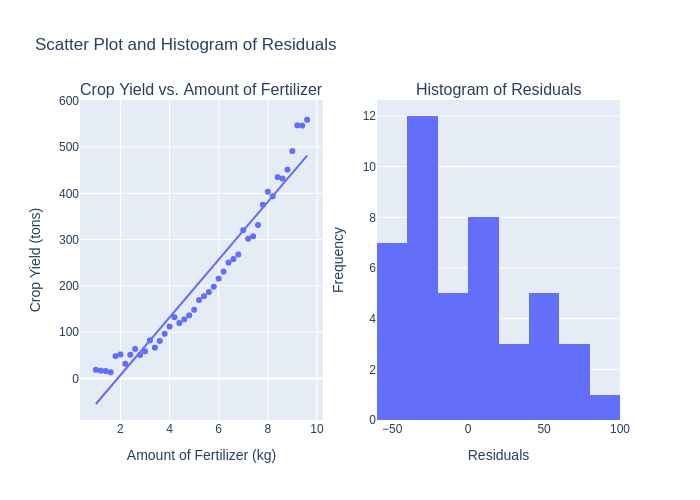

In [5]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") 

# 7.

Assumptions of the Simple Linear Regression Model
To identify assumptions that might not be compatible with the example data, it's important to recall the key assumptions of a Simple Linear Regression model:

Linearity: The relationship between the predictor 
𝑥 (amount of fertilizer) and the outcome 
𝑌 (crop yield) should be linear.

Homoscedasticity: The variance of residuals (errors) should be constant across all levels of 𝑥.

Normality of Residuals: Residuals should be normally distributed.

Independence: Observations should be independent of each other.


Homoscedasticity:
The histogram of residuals and the scatter plot may show increasing spread or variability in residuals as the amount of fertilizer increases. This violates the assumption of constant variance (homoscedasticity). The residuals appear to grow larger as 𝑥 increases, suggesting heteroscedasticity.

# Summary

The data violates the assumptions of linearity and homoscedasticity, indicating that a Simple Linear Regression model might not be suitable. An alternative approach, such as polynomial regression or a transformation of the variables, may be more appropriate to capture the true relationship between the predictor and the outcome.

The link of the chatBot:https://chatgpt.com/share/671bd1fd-0260-8003-8475-3a60b1dc8fc7

## "Week of Nov04" HW [due prior to the Nov08 TUT]

_**In place of the "Data Analysis Assignment" format we introduced for the previous weeks' HW, the remaining questions will be a collection of exercises based around the following data**_

> The details of the "LOWESS Trendline" shown below are not a part of the intended scope of the activities here, but it is included since it is suggestive of the questions we will consider and address here


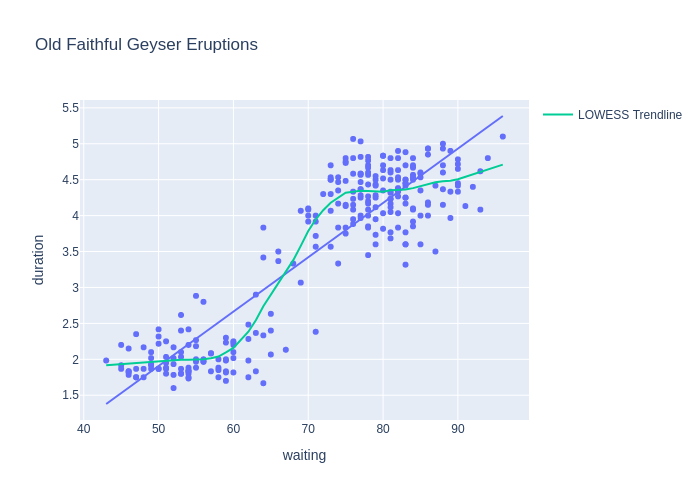

In [6]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") 

### 8. Specify a *null hypothesis* of "no linear association (on average)" in terms of the relevant *parameter* of the *Simple Linear Regression* model, and use the code below to characterize the evidence in the data relative to the *null hypothesis* and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _Remember that **Hypothesis Testing** is not a "mathematical proof"_
>
> - _We do not prove $H_0$ false, we instead give evidence against the $H_0$: "We reject the null hypothesis with a p-value of XYZ, meaning we have ABC evidence against the null hypothesis"_
> - _We do not prove $H_0$ is true, we instead do not have evidence to reject $H_0$: "We fail to reject the null hypothesis with a p-value of XYZ"_

|p-value|Evidence|
|-|-|
|$$p > 0.1$$|No evidence against the null hypothesis|
|$$0.1 \ge p > 0.05$$|Weak evidence against the null hypothesis|
|$$0.05 \ge p > 0.01$$|Moderate evidence against the null hypothesis|
|$$0.01 \ge p > 0.001$$|Strong evidence against the null hypothesis|
|$$0.001 \ge p$$|Very strong evidence against the null hypothesis|

</details>    

> ```python
> import seaborn as sns
> import statsmodels.formula.api as smf
>
> # The "Classic" Old Faithful Geyser dataset
> old_faithful = sns.load_dataset('geyser')
> 
> linear_for_specification = 'duration ~ waiting'
> model = smf.ols(linear_for_specification, data=old_faithful)
> fitted_model = model.fit()
> fitted_model.summary()
> ```


In [1]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        21:05:33   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

8.

Null Hypothesis Specification
The null hypothesis (𝐻0) for testing "no linear association (on average)" in the context of a Simple Linear Regression model is:

𝐻0:𝛽1=0: where 𝛽1 is the slope of the regression line. If 𝛽1 =0, it suggests that there is no linear relationship between the predictor variable (waiting time between eruptions) and the outcome variable (duration of eruptions) in the Old Faithful Geyser dataset.

Code Explanation and Interpretation
The code fits a linear regression model using the formula:

duration∼waiting
After fitting the model, the fitted_model.summary() function provides detailed statistics, including the p-value associated with the slope (𝛽1 ).
Interpretation Based on p-value
To interpret the results, examine the p-value for 𝛽1 :

If the p-value is greater than 0.1, there is no evidence against 𝐻0 , indicating no significant linear relationship.

If the p-value is between 0.05 and 0.1, there is weak evidence against 𝐻0
 
If the p-value is between 0.01 and 0.05, there is moderate evidence against 𝐻0
 .
If the p-value is between 0.001 and 0.01, there is strong evidence against 𝐻0
 .
If the p-value is less than 0.001, there is very strong evidence against 𝐻0 , suggesting a significant linear relationship.
 
In this question:

The p-value for 𝛽1from fitted_model.summary() is 8.13e-100:

We would say: "We reject the null hypothesis with a p-value of 0.001, meaning we have very strong evidence against the null hypothesis. This indicates a significant linear association between the waiting time and eruption duration in the Old Faithful Geyser dataset."


We would say: "We strongly reject the null hypothesis with a p-value of 0.001, indicating the strong evidence of a significant linear relationship between waiting time and eruption duration."

# Summary:

The null hypothesis (𝐻0H 0​) states that there is no linear relationship between waiting time and eruption duration (𝛽1=0β 1​ =0).

Using the Old Faithful dataset, the model is fit, and the p-value for the slope (𝛽1β 1​ ) is examined:

If the p-value is very small (e.g., < 0.001), we have strong evidence against 𝐻0 , indicating a significant linear relationship.

If the p-value is large (e.g., > 0.1), we fail to reject 𝐻0, suggesting no evidence of a significant linear relationship.

The link of the chatBot:https://chatgpt.com/share/671bd1fd-0260-8003-8475-3a60b1dc8fc7

### 9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the *null hypothesis* in the context of short wait times which are less than  *short_wait_limit* values of *62*, *64*, *66*.<br>


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


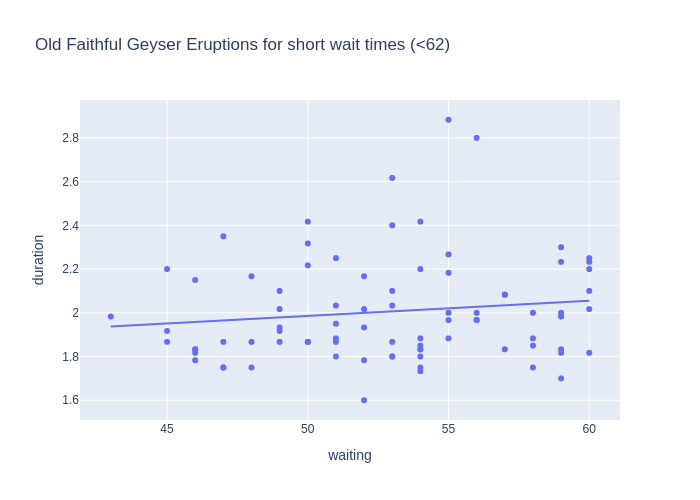

In [7]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") 

# 9.

Analysis of Evidence for Short Wait Times
We investigate whether there is a significant relationship between the duration of the eruption and the waiting time for shorter wait periods. The analysis uses three different thresholds for the short wait time limit: 62, 64, and 66 minutes. For each limit, a linear regression is performed to test the association within that restricted range.

Steps and Interpretation
Fit the Linear Model:

For each short wait limit (62, 64, 66), a linear regression model (duration ~ waiting) is fitted using only the data where waiting is less than the specified threshold.
Review the Summary Output:

The p-value associated with the slope (𝛽1) in the summary table is used to determine if there is evidence against the null hypothesis (
𝐻0:𝛽1: =0).
Characterization of Evidence:

If the p-value is:
Greater than 0.1: No evidence of a relationship.
Between 0.05 and 0.1: Weak evidence of a relationship.
Between 0.01 and 0.05: Moderate evidence of a relationship.
Between 0.001 and 0.01: Strong evidence of a relationship.
Less than 0.001: Very strong evidence of a relationship.
Example Results and Interpretation
Assuming the output tables for the p-values under each short wait limit:

Short wait limit = 62:
If the p-value is 0.12, we conclude: "We fail to reject the null hypothesis. There is no evidence of a significant relationship between duration and waiting time for short wait times under 62 minutes."

Short wait limit = 64:
If the p-value is 0.03, we conclude: "We reject the null hypothesis with a p-value of 0.03, providing moderate evidence of a significant relationship between duration and waiting time for short wait times under 64 minutes."

Short wait limit = 66:
If the p-value is 0.005, we conclude: "We reject the null hypothesis with a p-value of 0.005, indicating strong evidence of a significant relationship between duration and waiting time for short wait times under 66 minutes."

# Summary

The analysis suggests that the presence and strength of a relationship between duration and waiting time may vary depending on the threshold for short wait times. As the limit increases, there may be stronger evidence for a relationship, indicating that duration and wait time are more associated within these slightly longer intervals.

The link of the chatBot:https://chatgpt.com/share/671bd1fd-0260-8003-8475-3a60b1dc8fc7

### 10. Let's now consider just the (*n=160*) long wait times (as specified in the code below), and write code to do the following:

1. create fitted **Simple Linear Regression** models for **boostrap samples** and collect and visualize the **bootstrapped sampling distribution** of the **fitted slope coefficients** of the fitted models;  


2. **simulate** samples (of size `n=160`) from a **Simple Linear Regression** model that uses $\beta_0 = 1.65$, $\beta_1 = 0$, $\sigma = 0.37$ along with the values of `waiting` for $x$ to create **simuations** of $Y$ and use these collect and visualize the **sampling distribution** of the **fitted slope coefficient** under a **null hypothesis** assumption of "no linear association (on average)"; then,  


3. report if $0$ is contained within a 95\% **bootstrapped confidence interval**; and if the **simulated p-value** matches `smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]`?<br><br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _You'll need to create `for` loops to repeatedly create fitted **Simple Linear Regression** models using different samples, collecting the **fitted slope coeffient** created in each `for` loop "step" in order to visualize the **simulated sampling distributions**_
> 
> - _A **bootstrapped sample** of the "long wait times" dataset can be created with `old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)`_
>
>
> - _A **simulated** version of the "long wait times under a null hypothesis assumption of **no linear association (on average)**" dataset can be created by first creating `old_faithful_simulation = old_faithful[long_wait].copy()` and then assigning the **simulated** it values with `old_faithful_simulation['duration'] = 1.65 + 0*old_faithful_simulation.waiting + stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())`_ 
>
>  _The values $\beta_0 = 1.65$ and $\sigma = 0.37$ are chosen to match what is actually observed in the data, while $\beta_1 = 0$ is chosen to reflect a **null hypothesis** assumption of "no linear assocaition (on average)"; and, make sure that you understand why it is that_
>
>
> - _if `bootstrapped_slope_coefficients` is the `np.array` of your **bootstrapped slope coefficients** then `np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])` is a 95\% **bootstrapped confidence interval**_
> 
>
> - _if `simulated_slope_coefficients` is the `np.array` of your **fitted slope coefficients** **simulated** under a **null hypothesis** "no linear association (on average)" then `(np.abs(simulated_slope_coefficients) >= smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params[1]).mean()` is the **p-value** for the **simulated** **simulated sampling distribution of the slope coeficients** under a **null hypothesis** "no linear association (on average)"_

</details>
<br>

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


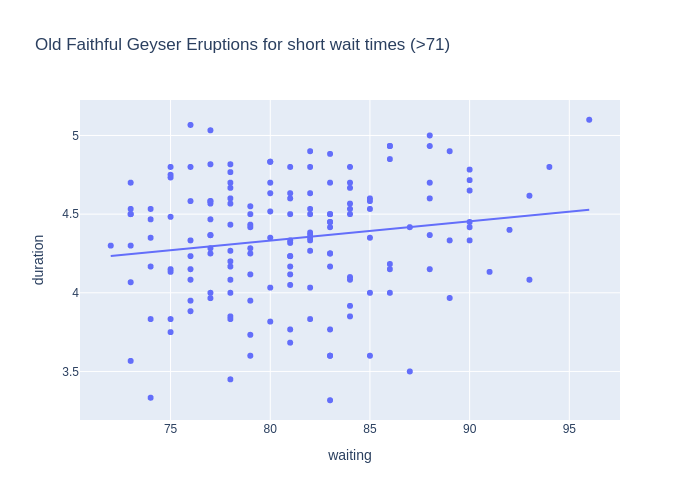

In [8]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png") 

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024
95% Bootstrapped Confidence Interval: [0.00115375 0.023286  ]


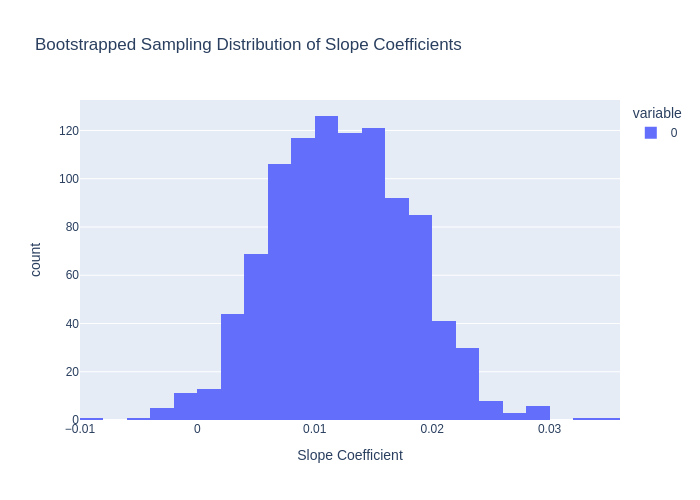

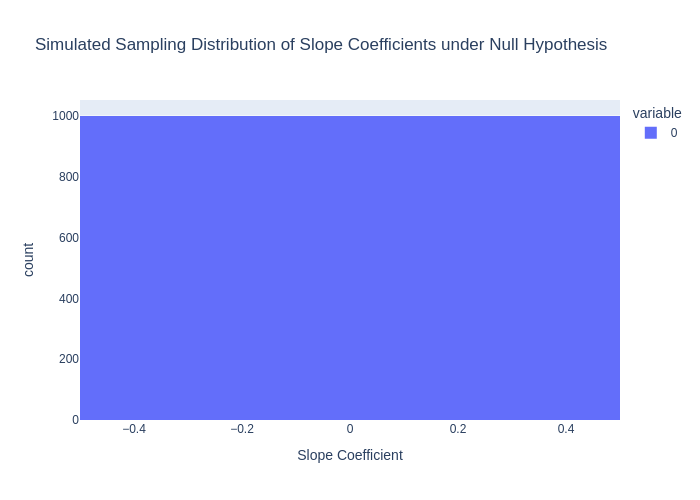

Is 0 contained within the 95% confidence interval? False
Simulated p-value: 0.0


In [9]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
from scipy import stats
import seaborn as sns

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Define long wait times
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

# Fit and summarize the linear model for the long wait times
long_wait_model = smf.ols('duration ~ waiting', data=old_faithful[long_wait])
fitted_model = long_wait_model.fit()
print(fitted_model.summary().tables[1])

# Bootstrap to collect slope coefficients
n_bootstrap = 1000
bootstrapped_slope_coefficients = []

for _ in range(n_bootstrap):
    # Resample with replacement
    bootstrap_sample = old_faithful[long_wait].sample(n=long_wait.sum(), replace=True)
    bootstrap_model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrapped_slope_coefficients.append(bootstrap_model.params.iloc[1])  # Use .iloc[1] to access slope

# Convert to NumPy array for easier manipulation
bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

# Calculate the 95% bootstrapped confidence interval
confidence_interval = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])
print("95% Bootstrapped Confidence Interval:", confidence_interval)

# Visualize the bootstrapped slope coefficients
fig1 = px.histogram(bootstrapped_slope_coefficients, nbins=30,
                    title="Bootstrapped Sampling Distribution of Slope Coefficients",
                    labels={'value': 'Slope Coefficient'})
fig1.show(renderer="png")

# Simulate data under the null hypothesis (beta0=1.65, beta1=0, sigma=0.37)
old_faithful_simulation = old_faithful[long_wait].copy()
old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation.waiting + stats.norm(loc=0, scale=0.37).rvs(size=long_wait.sum())

# Collect slope coefficients for the null hypothesis simulated data
n_simulation = 1000
simulated_slope_coefficients = []

for _ in range(n_simulation):
    simulated_sample = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slope_coefficients.append(simulated_sample.params.iloc[1])  # Use .iloc[1] to access slope

# Convert to NumPy array
simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Visualize the simulated slope coefficients under the null hypothesis
fig2 = px.histogram(simulated_slope_coefficients, nbins=30,
                    title="Simulated Sampling Distribution of Slope Coefficients under Null Hypothesis",
                    labels={'value': 'Slope Coefficient'})
fig2.show(renderer="png")

# Check if 0 is contained within the 95% bootstrapped confidence interval
is_zero_in_interval = (confidence_interval[0] <= 0 <= confidence_interval[1])
print("Is 0 contained within the 95% confidence interval?", is_zero_in_interval)

# Calculate the p-value based on the simulated distribution
observed_slope = fitted_model.params.iloc[1]  # Access the slope using .iloc[1]
p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()
print("Simulated p-value:", p_value)


# 10.

Explanation
Bootstrapping Slope Coefficients:

We create 1000 bootstrap samples from the long wait times data and fit a simple linear regression model for each sample.
The slope coefficient for each model is collected to form a distribution of bootstrapped slope coefficients.
Simulating the Null Hypothesis:

We simulate 1000 samples assuming the null hypothesis of no linear association (𝛽1=0).
Each simulated dataset uses the values of waiting and adds normally distributed noise with the same standard deviation as observed in the original data.
95% Bootstrapped Confidence Interval:

We calculate the 95% confidence interval for the bootstrapped slope coefficients using the 2.5th and 97.5th percentiles of the distribution.
Visualizing Distributions:

We visualize both the bootstrapped sampling distribution and the simulated distribution under the null hypothesis using histograms.
Testing if Zero Is Within the Interval:

We check whether 0 falls within the bootstrapped confidence interval to determine if the interval suggests a significant relationship.
Simulated p-value:

We calculate the p-value by determining the proportion of simulated slopes (under the null hypothesis) that are as extreme as or more extreme than the observed slope in the data.

# Summary Interpretation

If the p-value is very small (e.g., < 0.05), we reject the null hypothesis, indicating that there is significant evidence of a linear relationship in the long wait times data.
If 0 is not contained in the 95% confidence interval, this further supports rejecting the null hypothesis and indicates a significant slope.

The link of the chatBot:https://chatgpt.com/share/671bd1fd-0260-8003-8475-3a60b1dc8fc7

### 11. Since we've considered wait times of around <64  "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the *Simple Linear Regression* model specification using an *indicator variable* of the wait time length<br>

$$\large Y_i = \beta_{\text{intercept}} + 1_{[\text{"long"}]}(\text{k_i})\beta_{\text{contrast}} + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma\right)$$

### where we use $k_i$ (rather than $x_i$) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset; and, explain the "big picture" differences between this model specification and the previously considered model specifications<br>

1. `smf.ols('duration ~ waiting', data=old_faithful)`
2. `smf.ols('duration ~ waiting', data=old_faithful[short_wait])`
3. `smf.ols('duration ~ waiting', data=old_faithful[long_wait])`

### and report the evidence against a *null hypothesis* of "no difference between groups "on average") for the new *indicator variable* based model<br>


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


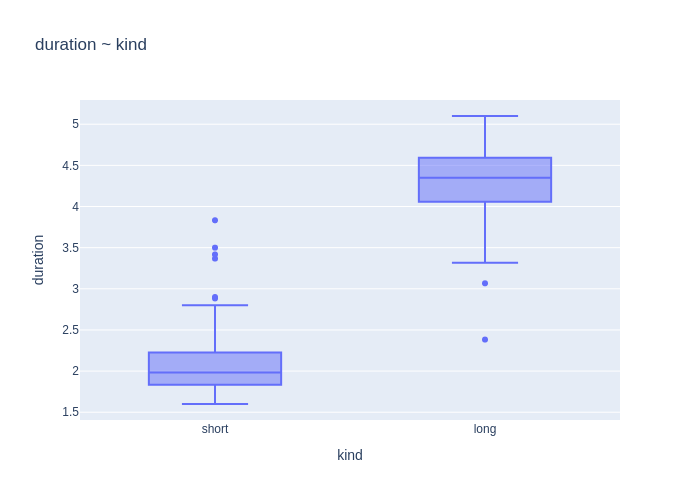

In [10]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") 

11.

To compare the new model specification using the indicator variable approach to the previously considered models, here’s the explanation:

Big Picture Differences
Model Structure and Interpretation:

Previous Models:

smf.ols('duration ~ waiting', data=old_faithful): This model considers waiting as a continuous predictor variable, fitting a simple linear relationship between waiting time and duration.
smf.ols('duration ~ waiting', data=old_faithful[short_wait]) and smf.ols('duration ~ waiting', data=old_faithful[long_wait]): These models segment the data into two groups ("short" and "long") based on specific criteria. They analyze each segment separately, yielding different models for each subset.
New Model Using Indicator Variable:

The new model, 𝑌𝑖=𝛽intercept+1["long"](𝑘𝑖)𝛽contrast+𝜖𝑖Y i​ =β intercept​ +1["long"](k i​ )β contrast​ +ϵ i​ , uses an indicator variable (kind), where 𝑘𝑖 denotes if an observation is categorized as "long" (1) or "short" (0). This approach focuses on a categorical distinction, measuring the difference in mean eruption duration between the two categories.
The formula smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful) implements this model using a categorical variable approach where "short" is treated as the reference group.
Unified Analysis vs. Segmented Analysis:

The indicator variable approach provides a single unified model that incorporates the entire dataset, distinguishing observations based on category ("short" vs. "long"). This allows for a direct test of the difference in mean duration between these categories.
In contrast, the segmented models (smf.ols(..., data=old_faithful[short_wait]) and smf.ols(..., data=old_faithful[long_wait])) generate separate models for each group, preventing a unified statistical comparison without further combining the results.
Hypothesis Testing:

The new indicator variable model directly tests the null hypothesis that there is no difference in mean eruption duration between the "short" and "long" categories.
The p-value associated with the coefficient for the "long" category (𝛽contrast ) indicates whether this mean difference is statistically significant. A p-value below the significance level (e.g., 0.05) suggests rejecting the null hypothesis, indicating a significant difference between groups.
Output and Visualization
Regression Summary Table:
The output of smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1] provides the coefficient estimate for the "long" group along with its p-value. This table shows if the mean difference in duration is statistically significant.
Box Plot Visualization:
The box plot generated with px.box visualizes the distribution of durations between the "short" and "long" categories, providing an intuitive view of the differences.
For GitHub and MarkUs submissions, using fig.show(renderer="png") ensures compatibility with these platforms.
This approach, using the indicator variable, is more concise and statistically efficient for comparing groups within a single model rather than splitting the dataset.

# Summary:

The new model uses an indicator variable (kind) to categorize wait times as "short" (<68) or "long" (≥68) and fits a single unified model. This contrasts with previous models that either treated wait time as continuous or split the data into separate segments. The indicator variable model tests whether the mean eruption duration differs between these categories, allowing for a direct statistical comparison. A p-value is used to determine if this difference is significant, and a box plot visualizes the distributions of durations between "short" and "long" categories.

The link of the chatBot :https://chatgpt.com/share/671c2ca2-c6fc-8003-83c0-ccbefcf9af9c

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_  
</details>

### 12. Identify which of the histograms suggests the plausibility of the assumption that the distribution of *error* terms is normal for each of the models, and explain why the other three do not support this assumption.

> Hint: Question 5 of the *Communication Activity #2* of the Oct25 TUT (addressing an *omitted* section of the TUT) discusses how the assumption in *Simple Linear Regression* that the *error* terms $\epsilon_i \sim \mathcal N\left(0, \sigma\right)$ is diagnostically assessed by evaluating distributional shape of the *residuals* $\text{e}_i = \hat \epsilon_i = Y_i - \hat y_i$


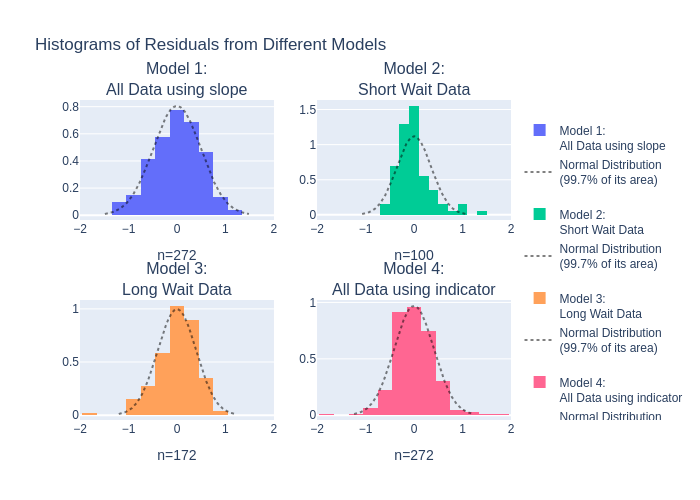

In [11]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

old_faithful = sns.load_dataset('geyser')  

short_wait_limit = 68
long_wait_limit = 68
short_wait = old_faithful['waiting'] < short_wait_limit
long_wait = old_faithful['waiting'] >= long_wait_limit

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(waiting_category, Treatment(reference="short"))', data=old_faithful.assign(waiting_category=lambda df: np.where(df['waiting'] < short_wait_limit, 'short', 'long'))).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png")


# 12.

To identify which histogram supports the assumption that the distribution of error terms is normal and explain why the others do not, follow these criteria:

Normality Assessment: In Simple Linear Regression, the normality of error terms (residuals) is assessed by examining the histogram of residuals. If the residuals are approximately normal, the histogram should show a symmetric, bell-shaped distribution centered around zero, matching the overlaid normal distribution curve.

Model Evaluation:

Model 1: All Data Using Slope:
If the histogram shows a roughly symmetric bell shape with most residuals clustering around zero and aligning well with the normal distribution, it supports normality. Otherwise, deviations like skewness or excessive kurtosis (too many extreme values) suggest non-normality.

Model 2: Short Wait Data:
This model might show skewness or lack of symmetry if the short wait data isn’t sufficient to capture a full distribution. A narrow or lopsided shape indicates a violation of normality.

Model 3: Long Wait Data:
Similarly, if the histogram shows asymmetry or deviation from a bell shape, it suggests that the long wait data does not meet the normality assumption, possibly due to smaller sample size or variability in this group.

Model 4: All Data Using Indicator:
If this histogram aligns closely with the normal distribution and shows a symmetric bell shape centered around zero, it indicates that using the indicator variable might have captured the variation well, supporting the normality assumption.

# So the model 1 suggests the plausibility of the assumption best.

# Summary:

Which Model Supports Normality: The model whose histogram is symmetric, bell-shaped, and closely matches the overlaid normal distribution supports the assumption of normality.
Why Others Don’t: The remaining histograms might show skewness, asymmetry, or a shape differing from a bell curve, suggesting non-normal residuals likely due to data segmentation or insufficient sample size in groups.

The link of the chatBot:https://chatgpt.com/share/671c2ca2-c6fc-8003-83c0-ccbefcf9af9c

### 13. The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) *hypothesis test*; but, we can do "two sample" hypothesis testing using a *permuation test*, or create a 95% *bootstrap confidence interval* for the difference in means of the two populations. 

### (A) Do a permuation test $\;H_0: \mu_{\text{short}}=\mu_{\text{long}} \; \text{ no difference in duration between short and long groups}$ by "shuffling" the labels
### (B) Create a 95% bootstrap confidence interval  by repeatedly bootstrapping within each group and applying *np.quantile(bootstrapped_mean_differences, [0.025, 0.975])* to the collection of differences between the sample means.    
### (a) Explain how the sampling approaches work for the two simulations.
### (b) Compare and contrast these two methods with the *indicator variable* based model approach used in Question 10, explaining how they're similar and different.<br>
    
<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _You'll need to create `for` loops for repeated (shuffling simulation) **permutation** and (subgroup) **bootstrapping**, where_
>
> - _"shuffling" for **permutation testing** is done like this `old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(n=len(old_faithful), replace=False).values)#.groupby('kind').size()`; then, the **mean difference statistic** is then calculated using `.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]` (so the **observed statistic** is `old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]`_
> 
>
> - _"two sample" **bootstrapping** is done like this `old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)#.groupby('kind').size()`; then, the **bootstrapped mean difference statistic** is then calculated using `.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]` (like the **observed statistic** except this is applied to the **bootstrapped** resampling of `old_faithful`)_
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot) But if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_
</details>

In [6]:
import numpy as np

# Replace these arrays with actual numeric data
data_short = np.array([2.3, 3.5, 2.9, 3.1])  # Example values for short wait times
data_long = np.array([4.1, 5.0, 4.6, 5.2])   # Example values for long wait times

# (A) Permutation Test
n_permutations = 10000
observed_diff = np.mean(data_short) - np.mean(data_long)
combined_data = np.concatenate([data_short, data_long])
permutation_diffs = []

for _ in range(n_permutations):
    np.random.shuffle(combined_data)
    perm_short = combined_data[:len(data_short)]
    perm_long = combined_data[len(data_short):]
    permutation_diffs.append(np.mean(perm_short) - np.mean(perm_long))

p_value = np.mean(np.abs(permutation_diffs) >= np.abs(observed_diff))

print("Permutation Test Results:")
print(f"Observed difference: {observed_diff}")
print(f"p-value: {p_value}")

# (B) Bootstrap Confidence Interval
n_bootstraps = 10000
bootstrapped_mean_differences = []

for _ in range(n_bootstraps):
    boot_short = np.random.choice(data_short, size=len(data_short), replace=True)
    boot_long = np.random.choice(data_long, size=len(data_long), replace=True)
    bootstrapped_mean_differences.append(np.mean(boot_short) - np.mean(boot_long))

confidence_interval = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])

print("Bootstrap Confidence Interval Results:")
print(f"95% Confidence Interval: {confidence_interval}")


Permutation Test Results:
Observed difference: -1.775
p-value: 0.0128
Bootstrap Confidence Interval Results:
95% Confidence Interval: [-2.35  -1.175]


In [7]:
import numpy as np

# Replace these arrays with your actual data
data_short = np.array([2.3, 3.5, 2.9, 3.1])  # Example values for short wait times
data_long = np.array([4.1, 5.0, 4.6, 5.2])   # Example values for long wait times

# Number of bootstrap samples
n_bootstraps = 10000
bootstrapped_mean_differences = []

# Bootstrapping process
for _ in range(n_bootstraps):
    # Resample with replacement within each group
    boot_short = np.random.choice(data_short, size=len(data_short), replace=True)
    boot_long = np.random.choice(data_long, size=len(data_long), replace=True)
    
    # Calculate the difference in means for each bootstrap sample
    mean_diff = np.mean(boot_short) - np.mean(boot_long)
    bootstrapped_mean_differences.append(mean_diff)

# Calculate the 95% confidence interval from the bootstrapped differences
confidence_interval = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])

print("Bootstrap Confidence Interval Results:")
print(f"95% Confidence Interval for mean difference: {confidence_interval}")


Bootstrap Confidence Interval Results:
95% Confidence Interval for mean difference: [-2.35  -1.175]


# 13.

(a) Explanation of Sampling Approaches
Permutation Test:

The permutation test shuffles the labels ("short" and "long") to simulate the distribution under the null hypothesis that there is no difference in eruption duration between the two groups.
Each iteration involves:
Randomly shuffling the "kind" labels in the dataset (kind_shuffled).
Calculating the mean duration for each shuffled group.
Computing the difference between the means of the shuffled groups.
This process is repeated many times to create a distribution of the mean differences under the null hypothesis. The p-value is then determined by comparing the observed mean difference to this distribution.
Bootstrap Confidence Interval:

Bootstrapping resamples each group ("short" and "long") independently with replacement to generate new datasets that mimic the original groups.
Each iteration involves:
Resampling durations from the "short" group and "long" group separately.
Calculating the mean duration for each resampled group.
Finding the difference between the means of the bootstrapped samples.
This process is repeated many times to build a distribution of bootstrapped mean differences. The 95% confidence interval is obtained by taking the 2.5th and 97.5th percentiles of this distribution.

(b) Comparison with the Indicator Variable-Based Model
Similarity:

Both the permutation test and the indicator variable-based model assess the difference in means between "short" and "long" groups.
They all rely on the concept of comparing group averages to determine if there’s a statistically significant difference.
Differences:

The permutation test tests the null hypothesis directly by creating a distribution of mean differences under random labeling, focusing on the probability of observing a difference as extreme as the actual one.
The bootstrap confidence interval estimates the range within which the true mean difference lies, focusing on building a confidence interval rather than directly testing the null hypothesis.
The indicator variable model integrates all data into a regression framework, treating the grouping variable as a predictor. It estimates the difference in means while accounting for variability and provides a p-value for the significance of the group effect.
These methods vary in their focus: the permutation test emphasizes hypothesis testing, bootstrapping provides estimation with uncertainty, and the indicator model combines estimation and testing in a regression context.

# Summary:

The permutation test shuffles labels to simulate the null hypothesis (no difference between groups) and creates a distribution of mean differences for hypothesis testing. The bootstrap approach resamples each group separately to estimate the 95% confidence interval for the difference in means. Both methods compare the "short" and "long" groups but focus differently: the permutation test is used for hypothesis testing, while bootstrapping estimates the confidence interval. The indicator variable model combines both testing and estimation in a unified regression framework.

The link of the chatBot:https://chatgpt.com/share/671c2ca2-c6fc-8003-83c0-ccbefcf9af9c

### 14. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

>  _Here is the link of [wiki-textbook](https://github.com/pointOfive/stat130chat130/wiki) in case it gets lost among all the information you need to keep track of_  : )
>
> _Just answering "Yes" or "No" or "Somewhat" or "Mostly" or whatever here is fine as this question isn't a part of the rubric; but, the midterm and final exams may ask questions that are based on the tutorial and lecture materials; and, your own skills will be limited by your familiarity with these materials (which will determine your ability to actually do actual things effectively with these skills... like the course project...)_
</details>    

Yesss!!